In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import hamming_loss
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import matthews_corrcoef

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("final_data.csv")
                 #xlsx and then encoding=utf-8 will also work
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)


In [3]:
df

,id,Age,EducationLevel,Gender,HasFamilyHistory,Occupation,ATF,EAF,TKF,CMT,DEF,SMF,ERF,DAF,HR,SW,TR,DR,BR,CK,CP,NS,DZ,UR,UB,MD,TG,hasSAD,SPIN,LSAS
0,1,27,4,1,0,3,4,2,6,2,0,1,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,1,23,39.0
1,5,24,4,1,0,3,3,0,3,1,0,4,4,4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,20,43.0
2,7,32,5,0,1,1,4,1,7,0,0,1,0,4,1,0,1,0,1,0,0,1,0,0,0,0,0,1,33,50.0
3,8,37,5,1,1,3,4,0,6,1,0,2,3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,30,44.0
4,9,33,5,1,0,2,5,1,5,1,1,5,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,16,NaN
5,10,26,3,1,0,5,3,3,6,1,1,2,3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,40.0
6,16,36,2,1,0,3,1,1,4,4,0,1,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,1,24,39.0
7,17,27,2,1,1,4,7,5,7,7,0,3,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,18,NaN
8,20,29,4,1,0,1,0,0,5,0,0,0,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1,27,54.0
9,21,26,4,0,0,3,5,2,3,2,0,2,0,2,0,1,0,0,0,1,0,0,0,1,0,0,0,1,32,59.0


In [4]:
df.describe()

,id,Age,EducationLevel,Gender,HasFamilyHistory,Occupation,ATF,EAF,TKF,CMT,DEF,SMF,ERF,DAF,HR,SW,TR,DR,BR,CK,CP,NS,DZ,UR,UB,MD,TG,hasSAD,SPIN,LSAS
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,160.000000
mean,126.084112,30.957944,4.084112,0.467290,0.327103,2.504673,3.448598,1.981308,4.130841,2.504673,1.411215,3.060748,2.789720,2.850467,0.771028,0.327103,0.462617,0.303738,0.210280,0.130841,0.102804,0.196262,0.168224,0.280374,0.214953,0.056075,0.172897,0.518692,22.355140,50.356250
std,66.843257,9.607465,1.179811,0.500099,0.470255,1.490967,2.712287,2.389261,3.021314,2.716231,2.175205,2.766509,2.747203,2.688189,0.421156,0.470255,0.499770,0.460949,0.408463,0.338017,0.304414,0.398100,0.374942,0.450235,0.411753,0.230605,0.379045,0.500822,12.325593,25.362367
min,1.000000,14.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,72.250000,24.000000,4.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.250000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.250000,32.000000
50%,127.500000,30.000000,4.000000,0.000000,0.000000,3.000000,3.000000,1.000000,4.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,21.000000,46.000000
75%,182.750000,35.000000,5.000000,1.000000,1.000000,4.000000,5.000000,3.000000,6.000000,4.000000,2.000000,5.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,31.000000,67.250000
max,240.000000,65.000000,6.000000,1.000000,1.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,56.000000,116.000000


In [5]:
df.shape

(214, 30)

In [6]:
df=df.replace('?', np.NaN)

In [7]:
df.isna().sum()

id                   0
Age                  0
EducationLevel       0
Gender               0
HasFamilyHistory     0
Occupation           0
ATF                  0
EAF                  0
TKF                  0
CMT                  0
DEF                  0
SMF                  0
ERF                  0
DAF                  0
HR                   0
SW                   0
TR                   0
DR                   0
BR                   0
CK                   0
CP                   0
NS                   0
DZ                   0
UR                   0
UB                   0
MD                   0
TG                   0
hasSAD               0
SPIN                 0
LSAS                54
dtype: int64

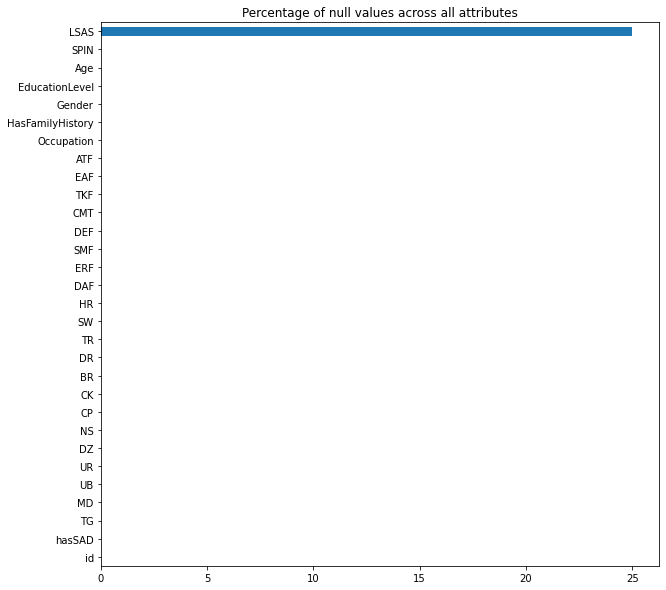

In [8]:
plt.figure(figsize=(10,10))
np.round(df.isnull().sum()/df.shape[0]*100).sort_values().plot(kind='barh')
plt.title("Percentage of null values across all attributes")
plt.savefig("Percentage of null values in the dataset", dpi=800,bbox_inches = 'tight')

In [9]:
#fillling empty values with median
df = df.fillna(df.median())
df.isna().sum()

id                  0
Age                 0
EducationLevel      0
Gender              0
HasFamilyHistory    0
Occupation          0
ATF                 0
EAF                 0
TKF                 0
CMT                 0
DEF                 0
SMF                 0
ERF                 0
DAF                 0
HR                  0
SW                  0
TR                  0
DR                  0
BR                  0
CK                  0
CP                  0
NS                  0
DZ                  0
UR                  0
UB                  0
MD                  0
TG                  0
hasSAD              0
SPIN                0
LSAS                0
dtype: int64

In [10]:
#df.to_csv("B:/social anxiety/final_data (3).csv")

In [11]:
df

,id,Age,EducationLevel,Gender,HasFamilyHistory,Occupation,ATF,EAF,TKF,CMT,DEF,SMF,ERF,DAF,HR,SW,TR,DR,BR,CK,CP,NS,DZ,UR,UB,MD,TG,hasSAD,SPIN,LSAS
0,1,27,4,1,0,3,4,2,6,2,0,1,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,1,23,39.0
1,5,24,4,1,0,3,3,0,3,1,0,4,4,4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,20,43.0
2,7,32,5,0,1,1,4,1,7,0,0,1,0,4,1,0,1,0,1,0,0,1,0,0,0,0,0,1,33,50.0
3,8,37,5,1,1,3,4,0,6,1,0,2,3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,30,44.0
4,9,33,5,1,0,2,5,1,5,1,1,5,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,16,46.0
5,10,26,3,1,0,5,3,3,6,1,1,2,3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,40.0
6,16,36,2,1,0,3,1,1,4,4,0,1,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,1,24,39.0
7,17,27,2,1,1,4,7,5,7,7,0,3,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,18,46.0
8,20,29,4,1,0,1,0,0,5,0,0,0,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1,27,54.0
9,21,26,4,0,0,3,5,2,3,2,0,2,0,2,0,1,0,0,0,1,0,0,0,1,0,0,0,1,32,59.0


In [12]:
#df=df.drop(["id","CD3dCD34","CD3dkgx10d8","Rbodymass","extcGvHD"], axis='columns')
#df

In [13]:
#df=df.drop(["survival_time"], axis='columns')
#df

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                214 non-null    int64  
 1   Age               214 non-null    int64  
 2   EducationLevel    214 non-null    int64  
 3   Gender            214 non-null    int64  
 4   HasFamilyHistory  214 non-null    int64  
 5   Occupation        214 non-null    int64  
 6   ATF               214 non-null    int64  
 7   EAF               214 non-null    int64  
 8   TKF               214 non-null    int64  
 9   CMT               214 non-null    int64  
 10  DEF               214 non-null    int64  
 11  SMF               214 non-null    int64  
 12  ERF               214 non-null    int64  
 13  DAF               214 non-null    int64  
 14  HR                214 non-null    int64  
 15  SW                214 non-null    int64  
 16  TR                214 non-null    int64  
 1

In [15]:
df = pd.get_dummies(df, columns = [ 'EducationLevel','Occupation','ATF','EAF','TKF','CMT','SMF','ERF','DAF'])
df

,id,Age,Gender,HasFamilyHistory,DEF,HR,SW,TR,DR,BR,CK,CP,NS,DZ,UR,UB,MD,TG,hasSAD,SPIN,LSAS,EducationLevel_1,EducationLevel_2,EducationLevel_3,EducationLevel_4,EducationLevel_5,EducationLevel_6,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,ATF_0,ATF_1,ATF_2,ATF_3,ATF_4,ATF_5,ATF_6,ATF_7,ATF_8,ATF_9,ATF_10,EAF_0,EAF_1,EAF_2,EAF_3,EAF_4,EAF_5,EAF_6,EAF_7,EAF_8,EAF_9,EAF_10,TKF_0,TKF_1,TKF_2,TKF_3,TKF_4,TKF_5,TKF_6,TKF_7,TKF_8,TKF_9,TKF_10,CMT_0,CMT_1,CMT_2,CMT_3,CMT_4,CMT_5,CMT_6,CMT_7,CMT_8,CMT_9,CMT_10,SMF_0,SMF_1,SMF_2,SMF_3,SMF_4,SMF_5,SMF_6,SMF_7,SMF_8,SMF_9,SMF_10,ERF_0,ERF_1,ERF_2,ERF_3,ERF_4,ERF_5,ERF_6,ERF_7,ERF_8,ERF_9,ERF_10,DAF_0,DAF_1,DAF_2,DAF_3,DAF_4,DAF_5,DAF_6,DAF_7,DAF_8,DAF_9,DAF_10
0,1,27,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,23,39.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,5,24,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,20,43.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,7,32,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,33,50.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,8,37,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,30,44.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,9,33,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,16,46.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,10,26,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,40.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,16,36,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,24,39.0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,17,27,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,18,46.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,20,29,1,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1,27,54.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,21,26,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,32,59.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [16]:
df=df.drop(["EducationLevel_1","EducationLevel_3","EducationLevel_4","Occupation_1","Occupation_3","Occupation_2","ATF_1","ATF_2","ATF_3","ATF_5","ATF_6","ATF_8","ATF_9","EAF_1","EAF_2","EAF_4","EAF_5","EAF_6","EAF_7","EAF_8","TKF_0","TKF_3","TKF_4","TKF_5","TKF_6","TKF_7","TKF_10","CMT_0","CMT_1","CMT_4","CMT_7","CMT_8","SMF_1","SMF_2","SMF_3","SMF_4","SMF_5","SMF_6","SMF_8","SMF_9","ERF_0","ERF_3","ERF_4","ERF_7","ERF_8","ERF_9","DAF_0","DAF_1","DAF_4","DAF_6","DAF_7","DAF_8","DAF_9"], axis='columns')
df

,id,Age,Gender,HasFamilyHistory,DEF,HR,SW,TR,DR,BR,CK,CP,NS,DZ,UR,UB,MD,TG,hasSAD,SPIN,LSAS,EducationLevel_2,EducationLevel_5,EducationLevel_6,Occupation_4,Occupation_5,ATF_0,ATF_4,ATF_7,ATF_10,EAF_0,EAF_3,EAF_9,EAF_10,TKF_1,TKF_2,TKF_8,TKF_9,CMT_2,CMT_3,CMT_5,CMT_6,CMT_9,CMT_10,SMF_0,SMF_7,SMF_10,ERF_1,ERF_2,ERF_5,ERF_6,ERF_10,DAF_2,DAF_3,DAF_5,DAF_10
0,1,27,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,23,39.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,5,24,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,20,43.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,32,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,33,50.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8,37,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,30,44.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,33,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,16,46.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,10,26,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,40.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,16,36,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,24,39.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,17,27,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,18,46.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,20,29,1,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1,27,54.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
9,21,26,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,32,59.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [17]:
df.shape

(214, 56)

In [18]:
df.hasSAD.value_counts()

1    111
0    103
Name: hasSAD, dtype: int64

In [19]:
# copy the data
df_max_scaled = df.copy()
  
# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
display(df_max_scaled)

,id,Age,Gender,HasFamilyHistory,DEF,HR,SW,TR,DR,BR,CK,CP,NS,DZ,UR,UB,MD,TG,hasSAD,SPIN,LSAS,EducationLevel_2,EducationLevel_5,EducationLevel_6,Occupation_4,Occupation_5,ATF_0,ATF_4,ATF_7,ATF_10,EAF_0,EAF_3,EAF_9,EAF_10,TKF_1,TKF_2,TKF_8,TKF_9,CMT_2,CMT_3,CMT_5,CMT_6,CMT_9,CMT_10,SMF_0,SMF_7,SMF_10,ERF_1,ERF_2,ERF_5,ERF_6,ERF_10,DAF_2,DAF_3,DAF_5,DAF_10
0,0.004167,0.415385,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.410714,0.336207,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.020833,0.369231,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357143,0.370690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.029167,0.492308,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.589286,0.431034,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.033333,0.569231,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.535714,0.379310,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.037500,0.507692,1.0,0.0,0.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285714,0.396552,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.041667,0.400000,1.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.428571,0.344828,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.066667,0.553846,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.428571,0.336207,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.070833,0.415385,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.321429,0.396552,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.083333,0.446154,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.482143,0.465517,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.087500,0.400000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.571429,0.508621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


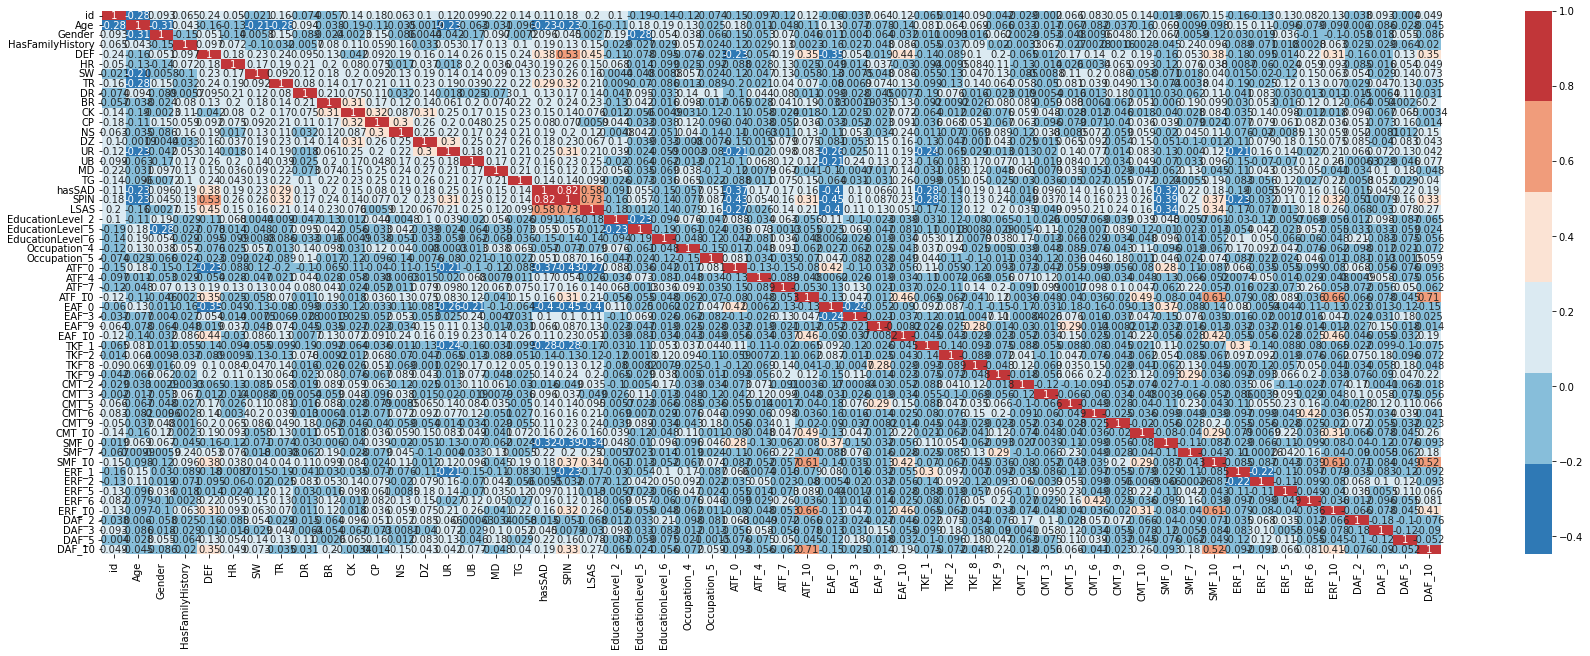

In [20]:
#Pearsons Co-relation
df_max_scaled = df_max_scaled.astype('float64')
import seaborn as sns
corr=df_max_scaled.corr()
plt.figure(figsize=(30,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.color_palette('RdBu_r'), 
            annot=True)
#plt.savefig("Pearson.png", dpi=600,bbox_inches = 'tight')
plt.show()

In [21]:
#Correlation with output variable
cor_target = abs(corr["hasSAD"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.0001 ]
relevant_features.sort_values(ascending=False)

hasSAD              1.000000
SPIN                0.821837
LSAS                0.576856
EAF_0               0.397538
DEF                 0.376466
ATF_0               0.368938
SMF_0               0.320486
TR                  0.293541
TKF_1               0.281795
UR                  0.247320
SW                  0.233065
Age                 0.228644
SMF_7               0.224236
DAF_5               0.217040
BR                  0.198722
TKF_8               0.194135
NS                  0.193442
HasFamilyHistory    0.193196
DAF_10              0.189832
ERF_1               0.188693
HR                  0.187324
DZ                  0.183191
SMF_10              0.177142
ATF_7               0.169166
ATF_4               0.167157
CMT_10              0.163607
ERF_10              0.163607
ATF_10              0.163607
UB                  0.162559
ERF_6               0.155243
CMT_6               0.155243
MD                  0.153485
EducationLevel_6    0.152867
CK                  0.151884
TKF_2         

In [22]:
df = df.astype('float64')

x = df.drop('hasSAD', axis=1)
y = df['hasSAD']

In [23]:
X_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [24]:
#Use mutual Information next and choose 20 features

In [25]:
#Mutual Information
from sklearn.feature_selection import mutual_info_classif
#Determine mutual informatiom
mutual_info=mutual_info_classif(X_train,y_train)
mutual_info

mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)



SPIN                0.695652
LSAS                0.248165
DEF                 0.112613
SMF_0               0.107646
EAF_0               0.099028
CMT_10              0.079262
ATF_10              0.076957
HasFamilyHistory    0.060262
SMF_10              0.057805
UR                  0.056038
ATF_0               0.050414
CMT_2               0.049636
Gender              0.049580
CMT_9               0.043785
ERF_1               0.041877
CMT_5               0.039669
EAF_3               0.036434
ERF_5               0.035961
SW                  0.032387
ATF_7               0.031498
ERF_10              0.025807
SMF_7               0.025065
EAF_9               0.024662
id                  0.020920
BR                  0.020421
ERF_2               0.020346
DAF_10              0.019434
HR                  0.018695
CK                  0.014488
TKF_1               0.014137
CMT_3               0.008633
TKF_9               0.008028
DZ                  0.002470
DAF_3               0.000000
DAF_2         

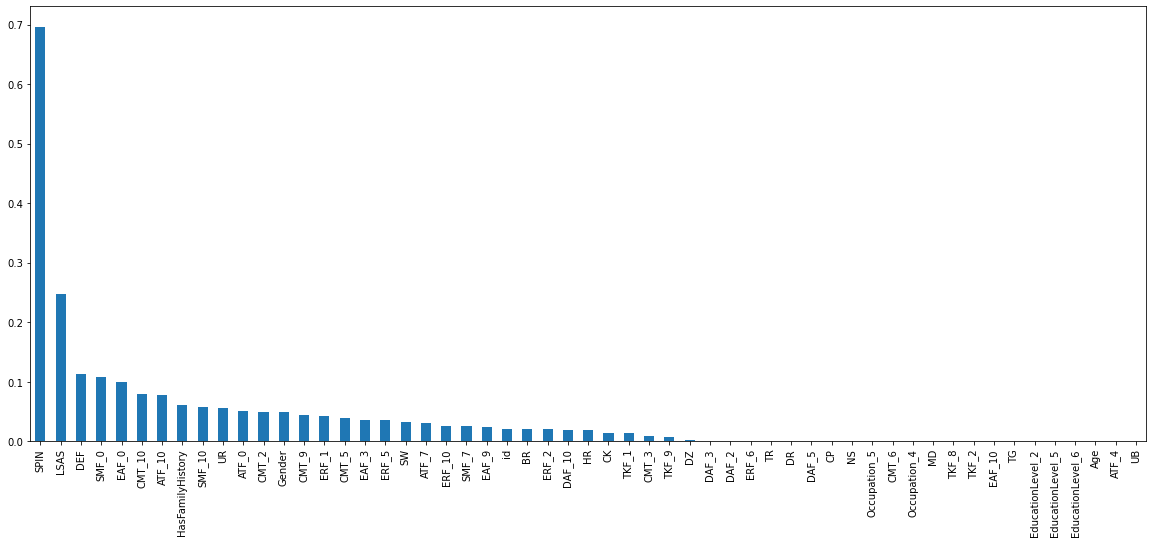

In [26]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))
plt.savefig("MutualInformation.png", dpi=600,bbox_inches = 'tight')

In [36]:
#Choose top 20
df= df[['LSAS','ATF_0','DAF_2','CMT_9','TR','TKF_1','HR','EAF_0','SW','DEF','MD','HasFamilyHistory','DAF_2','SMF_7','ERF_5','ATF_4','UR','ATF_7','hasSAD']]      
           

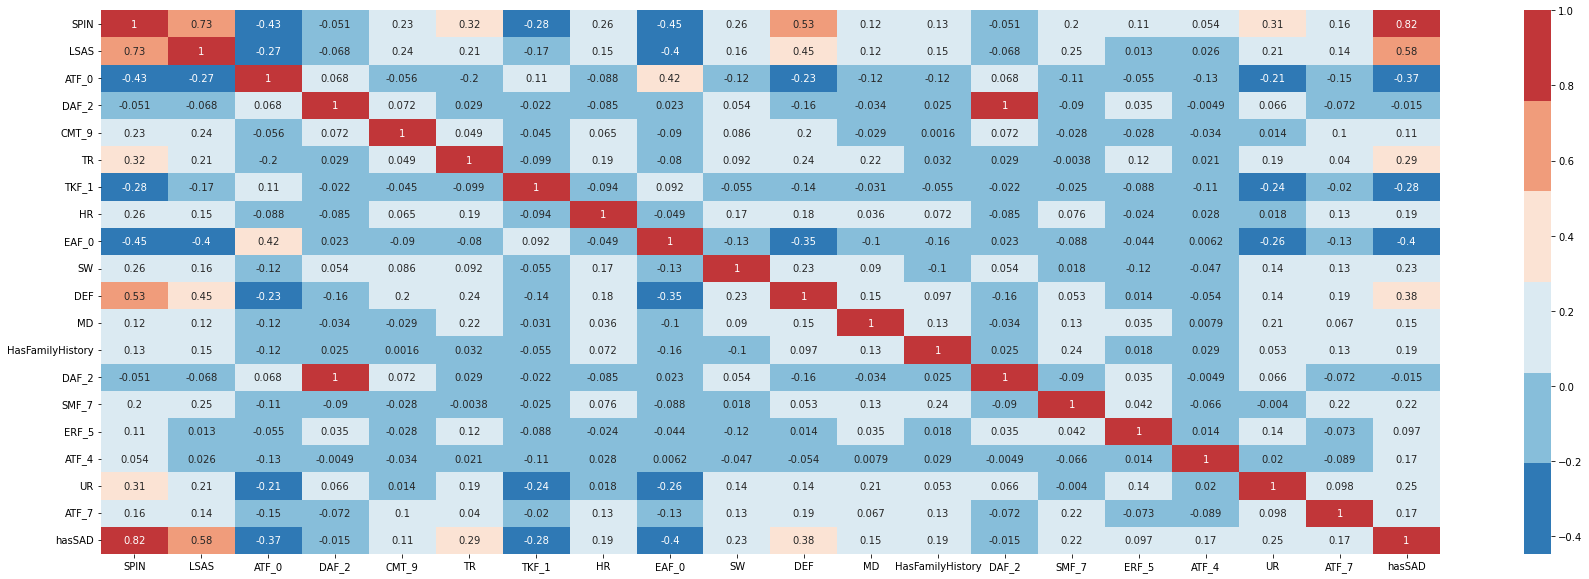

In [28]:
#Pearsons Co-relation
df = df.astype('float64')
import seaborn as sns
corr=df.corr()
plt.figure(figsize=(30,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.color_palette('RdBu_r'), 
            annot=True)
#plt.savefig("Pearson.png", dpi=600,bbox_inches = 'tight')
plt.show()

In [37]:
from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')

x = df.drop('hasSAD', axis=1)
y = df['hasSAD']

#oversample = BorderlineSMOTE()
#x, y = oversample.fit_resample(x, y)

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_train, y_train)


RandomForestClassifier()

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
y_pred = rf.predict(x_test)
y_proba = rf.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print("hamming loss")
print(hamming_loss(y_test, y_pred))
print("jaccord score")
print(jaccard_score(y_test, y_pred))
print("log loss")
print(log_loss(y_test,y_pred))
print("mathews correlation coefficient")
print(matthews_corrcoef(y_test, y_pred))

[[19  1]
 [ 4 19]]
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.88        20
         1.0       0.95      0.83      0.88        23

    accuracy                           0.88        43
   macro avg       0.89      0.89      0.88        43
weighted avg       0.89      0.88      0.88        43

hamming loss
0.11627906976744186
jaccord score
0.7916666666666666
log loss
4.016155385394968
mathews correlation coefficient
0.7760869565217391


In [ ]:
# RandomForest summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(a)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Random forest  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC RandomForest", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(rfclassifier, x_test, y_test,color='xkcd:black', name = 'Randomforest')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve random forest", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Random forest", dpi=800,bbox_inches = 'tight')
    

In [ ]:
#Logistic Regression
# Create the parameter grid based on the results of random search 
param_grid = {
    'penalty': ['l1','l2'],
    'C': [0.001,0.01,0.1,1,10,100,1000]
}

# Create a based model
lr = LogisticRegression()
# Instantiate the grid search model
lrClassifier = GridSearchCV(estimator = lr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

lrClassifier.fit(x_train, y_train)
lrClassifier.best_params_


In [ ]:
y_pred = lrClassifier.predict(x_test)
y_proba = lrClassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("hamming loss")
print(hamming_loss(y_test, y_pred))
print("jaccord score")
print(jaccard_score(y_test, y_pred))
print("log loss")
print(log_loss(y_test,y_pred))
print("mathews correlation coefficient")
print(matthews_corrcoef(y_test, y_pred))

# RandomForest summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(a)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Logistic Regression  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC RandomForest", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(lrClassifier, x_test, y_test,color='xkcd:black', name = '')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve random forest", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matrix Logistic regression", dpi=800,bbox_inches = 'tight')
    

In [ ]:

classifier_dtc = DecisionTreeClassifier()
classifier_dtc.fit(x_train,y_train)
y_pred=classifier_dtc.predict(x_test)

In [ ]:
#ELI5 
!pip install ELI5

import ELI5 as eli
eli.explain_weights(classifier_dtc)

In [ ]:
eli.explain_prediction(classifier_dtc , np.array(x_test)[1])

In [ ]:
eli.show_prediction(classifier_dtc, x_test.iloc[1],
                    feature_names=list(x_train.columns),
                    show_feature_values=True)

In [ ]:
#Decision Tree
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
    'min_samples_split' : range(10,500,20),
    'splitter' : ['best', 'random'],
    'min_samples_leaf': [1,5,8,11],
    'max_features': ['log2', 'sqrt','auto']
}

# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
dtClassifier = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

dtClassifier.fit(x_train, y_train)
dtClassifier.best_params_

In [ ]:
y_pred = dtClassifier.predict(x_test)
y_proba = dtClassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("hamming loss")
print(hamming_loss(y_test, y_pred))
print("jaccord score")
print(jaccard_score(y_test, y_pred))
print("log loss")
print(log_loss(y_test,y_pred))
print("mathews correlation coefficient")
print(matthews_corrcoef(y_test, y_pred))

 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(a)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Decision tree  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Decision Tree", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(dtClassifier, x_test, y_test,color='xkcd:black', name = 'Decision Tree')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve random forest", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Decision Tree", dpi=800,bbox_inches = 'tight')
    

In [ ]:
# Create a based model
knn = KNeighborsClassifier(algorithm = 'brute')

k_range = list(range(1, 100))
param_grid = dict(n_neighbors=k_range)

# Instantiate the grid search model
knnClassifier = GridSearchCV(estimator = knn, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

knnClassifier.fit(x_train, y_train)
knnClassifier.best_params_


In [ ]:
y_pred = knnClassifier.predict(x_test)
y_proba = knnClassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("hamming loss")
print(hamming_loss(y_test, y_pred))
print("jaccord score")
print(jaccard_score(y_test, y_pred))
print("log loss")
print(log_loss(y_test,y_pred))
print("mathews correlation coefficient")
print(matthews_corrcoef(y_test, y_pred))


print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(a)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='KNN  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC KNN", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(knnClassifier, x_test, y_test,color='xkcd:black', name = 'KNN')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR KNN", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix KNN", dpi=800,bbox_inches = 'tight')
    


In [ ]:
# Create a based model
from sklearn import svm
clf = svm.SVC(kernel='linear',probability=True)
clf.fit(x_train, y_train)

In [ ]:
y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(a)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='SVM  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC SVM", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(clf, x_test, y_test,color='xkcd:black', name = 'SVM')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve SVM", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix SVM", dpi=800,bbox_inches = 'tight')
    

In [ ]:
# Create a based model
from sklearn import svm
clf = svm.SVC(kernel='sigmoid',probability=True)
clf.fit(x_train, y_train)

In [ ]:
y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(a)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='SVM  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC SVM", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(clf, x_test, y_test,color='xkcd:black', name = 'SVM')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve SVM", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix SVM", dpi=800,bbox_inches = 'tight')
    

In [ ]:
# Three models 
!pip install mlxtend
from mlxtend.classifier import EnsembleVoteClassifier

clf1 = lrClassifier
#clf2 = dtClassifier
clf3 = knnClassifier 
clf6=rf

from mlxtend.classifier import StackingClassifier
# meta-classifier 
meta_clf = LogisticRegression(random_state=42)

# Stacking 
stack1 = StackingClassifier(classifiers=[clf1,  clf3 , clf6],
                           use_probas=True,
                           average_probas=False,
                          meta_classifier=meta_clf)

In [ ]:
stack1.fit(x_train, y_train)
y_pred = stack1.predict(x_test)
y_proba = stack1.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("hamming loss")
print(hamming_loss(y_test, y_pred))
print("jaccord score")
print(jaccard_score(y_test, y_pred))
print("log loss")
print(log_loss(y_test,y_pred))
print("mathews correlation coefficient")
print(matthews_corrcoef(y_test, y_pred))

# StackingClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(a)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Stacking   AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC RandomForest", dpi=800,bbox_inches = 'tight')
    
plt.show()
    

plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve Stack1", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Stack1", dpi=800,bbox_inches = 'tight')
    

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 1000],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]
}

# Create a based model
ad = AdaBoostClassifier()
# Instantiate the grid search model
grid_searchAdaBoostClassifier = GridSearchCV(estimator = ad, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_searchAdaBoostClassifier.fit(x_train, y_train)
grid_searchAdaBoostClassifier.best_params_

In [ ]:
y_pred = grid_searchAdaBoostClassifier.predict(x_test)
y_proba = grid_searchAdaBoostClassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("hamming loss")
print(hamming_loss(y_test, y_pred))
print("jaccord score")
print(jaccard_score(y_test, y_pred))
print("log loss")
print(log_loss(y_test,y_pred))
print("mathews correlation coefficient")
print(matthews_corrcoef(y_test, y_pred))

# ExtratreeClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(c)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Adaboost  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Adaboost", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(dtClassifier, x_test, y_test,color='xkcd:black', name = 'Adaboost')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve Adaboost", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Adaboost", dpi=800,bbox_inches = 'tight')
    

In [ ]:
from catboost import CatBoostClassifier

param_grid = {'depth':[3,1,2],
          'iterations':[250,100],
          'learning_rate':[0.03,0.001], 
          'l2_leaf_reg':[3,1,5,10],
          'border_count':[32,5,10],
        
             }

# Create a based model
cd = CatBoostClassifier()
# Instantiate the grid search model
grid_searchCatBoostClassifier = GridSearchCV(estimator = cd, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_searchCatBoostClassifier.fit(x_train, y_train)
grid_searchCatBoostClassifier.best_params_


In [ ]:
y_pred = grid_searchCatBoostClassifier.predict(x_test)
y_proba = grid_searchCatBoostClassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("hamming loss")
print(hamming_loss(y_test, y_pred))
print("jaccord score")
print(jaccard_score(y_test, y_pred))
print("log loss")
print(log_loss(y_test,y_pred))
print("mathews correlation coefficient")
print(matthews_corrcoef(y_test, y_pred))

# ExtratreeClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(d)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Catboost  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Catboost", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(grid_searchCatBoostClassifier, x_test, y_test,color='xkcd:black', name = 'Catboost')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve Catboost", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Catboost", dpi=800,bbox_inches = 'tight')
    

In [ ]:
!pip install lightgbm
from lightgbm import LGBMClassifier

param_grid = {
     'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
             
        
             }

# Create a based model
lg =  LGBMClassifier()
# Instantiate the grid search model
lgm = GridSearchCV(estimator = lg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

lgm.fit(x_train, y_train)
lgm.best_params_


In [ ]:
y_pred = lgm.predict(x_test)
y_proba = lgm.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ExtratreeClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(e)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Lightgbm  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Lightgbm", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(lgm, x_test, y_test,color='xkcd:black', name = 'Lightgbm')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve Lightgbm", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Lightgbm", dpi=800,bbox_inches = 'tight')
    

In [ ]:

from xgboost import XGBClassifier

param_grid = {
    "learning_rate": (0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4],
             
        
             }

# Create a based model
lg = XGBClassifier()
# Instantiate the grid search model
xgb = GridSearchCV(estimator = lg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

xgb.fit(x_train, y_train)
xgb.best_params_



In [ ]:
y_pred = xgb.predict(x_test)
y_proba = xgb.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("hamming loss")
print(hamming_loss(y_test, y_pred))
print("jaccord score")
print(jaccard_score(y_test, y_pred))
print("log loss")
print(log_loss(y_test,y_pred))
print("mathews correlation coefficient")
print(matthews_corrcoef(y_test, y_pred))

# ExtratreeClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(f)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Xgboost  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Xgboost", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(xgb, x_test, y_test,color='xkcd:black', name = 'Xgboost')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve xgboost", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Xgboost", dpi=800,bbox_inches = 'tight')
    

In [ ]:
#Stacking
# Three models 
from mlxtend.classifier import StackingClassifier
clf1 = grid_searchAdaBoostClassifier
clf2 = rfclassifier
clf3 = grid_searchCatBoostClassifier 
clf4 = lgm
clf5= xgb



# meta-classifier 
meta_clf = LogisticRegression(random_state=42,max_iter=9000)

# Stacking 
stack2 = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4,clf5],
                           use_probas=True,
                           average_probas=False,
                          meta_classifier=meta_clf)

In [ ]:
stack2.fit(x_train, y_train)
y_pred = stack2.predict(x_test)
y_proba = stack2.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("hamming loss")
print(hamming_loss(y_test, y_pred))
print("jaccord score")
print(jaccard_score(y_test, y_pred))
print("log loss")
print(log_loss(y_test,y_pred))
print("mathews correlation coefficient")
print(matthews_corrcoef(y_test, y_pred))

# StackingClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))


fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(h)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='StackB  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC StackB", dpi=800,bbox_inches = 'tight')
    
plt.show()
    


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.suptitle('(b)', fontsize=10,fontweight='bold')
plt.savefig("Confusion matrix StackB", dpi=800,bbox_inches = 'tight')
        



In [ ]:
#Precsiion Recall Curve
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds=precision_recall_curve(y_test,y_pred)
fig, ax=plt.subplots()
ax.plot(recall,precision,color='black')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
plt.savefig("PR StackB", dpi=800,bbox_inches = 'tight')
plt.show()

In [ ]:
#Final Stacking
#Stacking
# Three models 
from mlxtend.classifier import StackingClassifier
clf1 = stack1
clf2 = stack2


# meta-classifier 
meta_clf = LogisticRegression(random_state=42,max_iter=9000)

# Stacking 
stack3 = StackingClassifier(classifiers=[clf1, clf2],
                           use_probas=True,
                           average_probas=False,
                          meta_classifier=meta_clf)


In [ ]:
stack3.fit(x_train, y_train)


In [ ]:
y_pred = stack3.predict(x_test)
y_proba = stack3.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("hamming loss")
print(hamming_loss(y_test, y_pred))
print("jaccord score")
print(jaccard_score(y_test, y_pred))
print("log loss")
print(log_loss(y_test,y_pred))
print("mathews correlation coefficient")
print(matthews_corrcoef(y_test, y_pred))

# StackingClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(d)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC mutual information", dpi=800,bbox_inches = 'tight')
    
plt.show()
    

#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.suptitle('(d)', fontsize=10,fontweight='bold')
plt.savefig("Confusion Matix Mutual Information,", dpi=800,bbox_inches = 'tight')
    


In [ ]:

precision,recall,thresholds=precision_recall_curve(y_test,y_pred)
fig, ax=plt.subplots()
ax.plot(recall,precision,color='blue')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
plt.savefig("PR Mutual Information", dpi=800,bbox_inches = 'tight')
plt.show()

# Explainable AI


In [ ]:
import shap
shap.initjs()
explainer = shap.Explainer(rfclassifier.predict, x_train)
shap_values = explainer(x_train)

In [ ]:

fig=plt.figure()
plt.title('(a)')
fig=shap.plots.beeswarm(shap_values, max_display=25,show=False)
plt.savefig("BeeSwarm1.png", dpi=700,bbox_inches = 'tight')
plt.show()

In [ ]:
# Average feature contribution
plt.title('(b)')

fig=shap.summary_plot(shap_values, x_train, plot_type="bar",show=False)
plt.savefig("BarChartSHAP.png", dpi=100,bbox_inches = 'tight')
plt.show()

In [ ]:
import lime
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=x_train.columns,
    mode='classification'
)

In [ ]:
exp = interpretor.explain_instance(
    data_row=x_test.iloc[12], ##new data
    predict_fn=rfclassifier.predict_proba
)
exp.save_to_file('LIME1.html')

fig = exp.as_pyplot_figure()
fig.savefig('lime_report.png')

fig=exp.show_in_notebook(show_table=True)
plt.savefig("LIMESurvived.png", dpi=100,bbox_inches = 'tight')
plt.show()

In [ ]:
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()
    plt.title("(c)")
    plt.savefig("LIME1.png", dpi=600,bbox_inches = 'tight')

In [ ]:
exp = interpretor.explain_instance(
    data_row=x_test.iloc[25], ##new data
    predict_fn=rfclassifier.predict_proba
)

fig=exp.show_in_notebook(show_table=True)

In [ ]:
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()
    plt.title("(d)")
    plt.savefig("LIME2.png", dpi=600,bbox_inches = 'tight')

In [ ]:
import feyn

In [ ]:
ql = feyn.connect_qlattice()

In [ ]:
ql.reset(random_seed=42)

In [ ]:
fig = ql.auto_run(df, output_name="survival_status", kind="classification", max_complexity=5)

In [ ]:
fig[0].plot_roc_curve(df, label="Testing data")


In [ ]:
fig[0].sympify(2)